In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 

In [ ]:
df = pd.read_excel('/content/PetugasKesehatan.xlsx')
df


,Dokter,Dokter Gigi,Perawat,Bidan,Tenaga Kefarmasian
0,1204,143,4424,2342,759
1,664,63,2272,1512,248
2,425,46,1670,2106,181
3,625,114,2001,913,413
4,488,34,2299,1567,259
5,191,25,1074,1210,112
6,182,25,1178,786,188
7,372,32,1405,1051,491
8,855,62,3052,1622,489
9,266,24,442,802,37


In [ ]:
df.isnull().sum()

 Dokter                 0
 Dokter Gigi            0
 Perawat                0
 Bidan                  0
 Tenaga Kefarmasian     0
dtype: int64

In [ ]:
df.describe()

,Dokter,Dokter Gigi,Perawat,Bidan,Tenaga Kefarmasian
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,893.000000,154.185185,2206.740741,1059.481481,382.185185
std,1236.634266,446.315690,1799.050724,563.947513,387.615991
min,78.000000,12.000000,442.000000,229.000000,37.000000
25%,253.000000,27.500000,1129.000000,673.500000,161.000000
50%,488.000000,43.000000,1554.000000,913.000000,259.000000
75%,819.000000,99.000000,3063.000000,1468.000000,467.000000
max,6078.000000,2367.000000,8481.000000,2342.000000,1510.000000


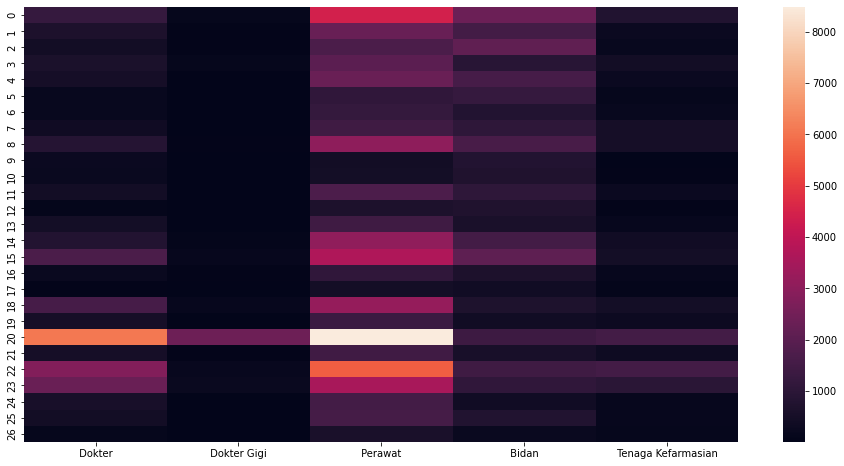

In [ ]:
plt.figure(1, figsize = (16 ,8))
sns.heatmap(df)
plt.show()

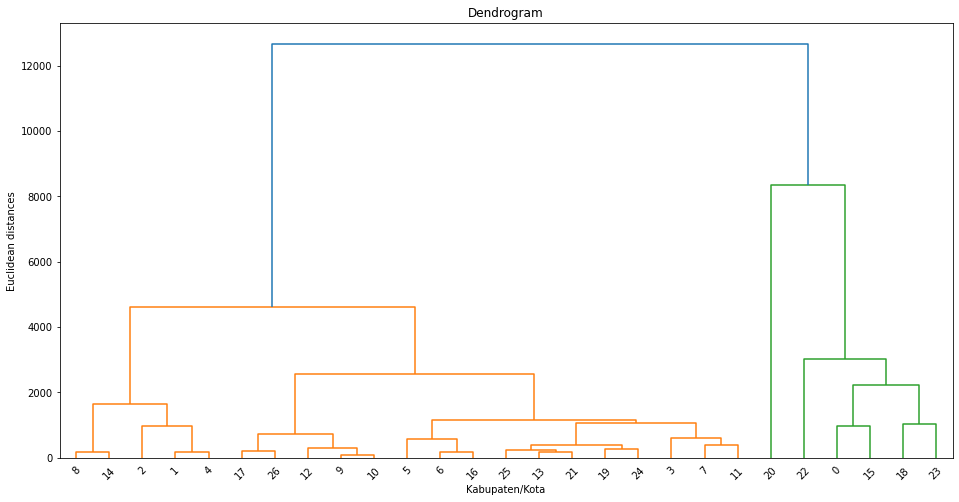

In [ ]:
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(df, method  = "ward"))

plt.title('Dendrogram')
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='average')

y_hc = hc.fit_predict(df)
y_hc

array([5, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 5, 1, 1, 2, 1, 3, 1,
       4, 2, 1, 1, 1])

In [ ]:
df['cluster'] = pd.DataFrame(y_hc)

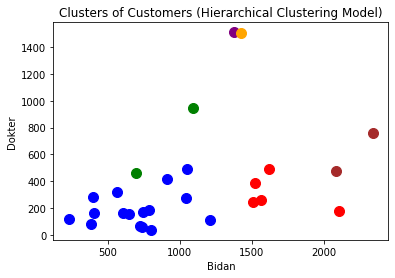

In [ ]:
X = df.iloc[:, [3,4]].values
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='purple', label ='Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='orange', label ='Cluster 5')
plt.scatter(X[y_hc==5, 0], X[y_hc==5, 1], s=100, c='brown', label ='Cluster 6')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Bidan')
plt.ylabel('Dokter')
plt.show()

In [ ]:
df.head(27)

,Dokter,Dokter Gigi,Perawat,Bidan,Tenaga Kefarmasian,cluster
0,1204,143,4424,2342,759,5
1,664,63,2272,1512,248,0
2,425,46,1670,2106,181,0
3,625,114,2001,913,413,1
4,488,34,2299,1567,259,0
5,191,25,1074,1210,112,1
6,182,25,1178,786,188,1
7,372,32,1405,1051,491,1
8,855,62,3052,1622,489,0
9,266,24,442,802,37,1
